In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [42]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [43]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

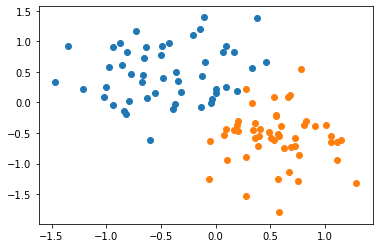

In [44]:
scatter_plot()

In [58]:
class Model(nn.Module) :
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [59]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [60]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
    return w1.item(),w2.item(), b1.item()

In [61]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()

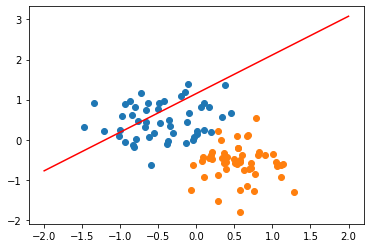

In [62]:
plot_fit('Initial Model')

In [63]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [67]:
epochs = 3000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch: ", i, "loss:", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  0 loss: 0.2113351672887802
epoch:  1 loss: 0.21126753091812134
epoch:  2 loss: 0.21119998395442963
epoch:  3 loss: 0.21113258600234985
epoch:  4 loss: 0.2110651433467865
epoch:  5 loss: 0.2109977900981903
epoch:  6 loss: 0.2109304964542389
epoch:  7 loss: 0.21086326241493225
epoch:  8 loss: 0.21079616248607635
epoch:  9 loss: 0.21072904765605927
epoch:  10 loss: 0.21066206693649292
epoch:  11 loss: 0.21059513092041016
epoch:  12 loss: 0.2105281800031662
epoch:  13 loss: 0.21046139299869537
epoch:  14 loss: 0.21039453148841858
epoch:  15 loss: 0.2103279083967209
epoch:  16 loss: 0.2102612555027008
epoch:  17 loss: 0.2101946473121643
epoch:  18 loss: 0.21012812852859497
epoch:  19 loss: 0.2100616842508316
epoch:  20 loss: 0.2099953442811966
epoch:  21 loss: 0.2099289894104004
epoch:  22 loss: 0.20986266434192657
epoch:  23 loss: 0.20979654788970947
epoch:  24 loss: 0.20973040163516998
epoch:  25 loss: 0.2096642702817917
epoch:  26 loss: 0.20959828794002533
epoch:  27 loss: 0.2095

epoch:  475 loss: 0.18508854508399963
epoch:  476 loss: 0.18504327535629272
epoch:  477 loss: 0.184998020529747
epoch:  478 loss: 0.18495282530784607
epoch:  479 loss: 0.18490765988826752
epoch:  480 loss: 0.18486252427101135
epoch:  481 loss: 0.18481744825839996
epoch:  482 loss: 0.18477240204811096
epoch:  483 loss: 0.18472737073898315
epoch:  484 loss: 0.18468238413333893
epoch:  485 loss: 0.18463736772537231
epoch:  486 loss: 0.18459250032901764
epoch:  487 loss: 0.1845475435256958
epoch:  488 loss: 0.18450269103050232
epoch:  489 loss: 0.1844578981399536
epoch:  490 loss: 0.18441307544708252
epoch:  491 loss: 0.18436838686466217
epoch:  492 loss: 0.18432363867759705
epoch:  493 loss: 0.18427887558937073
epoch:  494 loss: 0.18423423171043396
epoch:  495 loss: 0.184189572930336
epoch:  496 loss: 0.18414504826068878
epoch:  497 loss: 0.18410047888755798
epoch:  498 loss: 0.18405595421791077
epoch:  499 loss: 0.18401144444942474
epoch:  500 loss: 0.1839669942855835
epoch:  501 loss: 0

epoch:  955 loss: 0.16662459075450897
epoch:  956 loss: 0.16659189760684967
epoch:  957 loss: 0.16655917465686798
epoch:  958 loss: 0.16652646660804749
epoch:  959 loss: 0.16649377346038818
epoch:  960 loss: 0.16646113991737366
epoch:  961 loss: 0.16642847657203674
epoch:  962 loss: 0.16639584302902222
epoch:  963 loss: 0.16636325418949127
epoch:  964 loss: 0.16633066534996033
epoch:  965 loss: 0.16629812121391296
epoch:  966 loss: 0.1662655621767044
epoch:  967 loss: 0.16623306274414062
epoch:  968 loss: 0.16620054841041565
epoch:  969 loss: 0.16616809368133545
epoch:  970 loss: 0.16613563895225525
epoch:  971 loss: 0.16610310971736908
epoch:  972 loss: 0.16607068479061127
epoch:  973 loss: 0.1660383641719818
epoch:  974 loss: 0.16600589454174042
epoch:  975 loss: 0.16597358882427216
epoch:  976 loss: 0.16594117879867554
epoch:  977 loss: 0.16590893268585205
epoch:  978 loss: 0.1658766120672226
epoch:  979 loss: 0.16584432125091553
epoch:  980 loss: 0.16581210494041443
epoch:  981 los

epoch:  1495 loss: 0.15141083300113678
epoch:  1496 loss: 0.15138660371303558
epoch:  1497 loss: 0.1513623297214508
epoch:  1498 loss: 0.15133808553218842
epoch:  1499 loss: 0.15131379663944244
epoch:  1500 loss: 0.15128958225250244
epoch:  1501 loss: 0.15126533806324005
epoch:  1502 loss: 0.15124115347862244
epoch:  1503 loss: 0.1512169986963272
epoch:  1504 loss: 0.1511927843093872
epoch:  1505 loss: 0.1511685848236084
epoch:  1506 loss: 0.15114445984363556
epoch:  1507 loss: 0.15112030506134033
epoch:  1508 loss: 0.1510961949825287
epoch:  1509 loss: 0.15107207000255585
epoch:  1510 loss: 0.151047945022583
epoch:  1511 loss: 0.15102384984493256
epoch:  1512 loss: 0.15099970996379852
epoch:  1513 loss: 0.15097565948963165
epoch:  1514 loss: 0.1509515941143036
epoch:  1515 loss: 0.15092754364013672
epoch:  1516 loss: 0.15090355277061462
epoch:  1517 loss: 0.15087947249412537
epoch:  1518 loss: 0.15085551142692566
epoch:  1519 loss: 0.15083149075508118
epoch:  1520 loss: 0.150807499885

epoch:  2040 loss: 0.13975363969802856
epoch:  2041 loss: 0.13973475992679596
epoch:  2042 loss: 0.13971592485904694
epoch:  2043 loss: 0.13969705998897552
epoch:  2044 loss: 0.1396782249212265
epoch:  2045 loss: 0.13965941965579987
epoch:  2046 loss: 0.13964053988456726
epoch:  2047 loss: 0.13962174952030182
epoch:  2048 loss: 0.13960298895835876
epoch:  2049 loss: 0.13958415389060974
epoch:  2050 loss: 0.1395653635263443
epoch:  2051 loss: 0.13954658806324005
epoch:  2052 loss: 0.1395278126001358
epoch:  2053 loss: 0.13950905203819275
epoch:  2054 loss: 0.1394903063774109
epoch:  2055 loss: 0.13947154581546783
epoch:  2056 loss: 0.13945278525352478
epoch:  2057 loss: 0.1394340544939041
epoch:  2058 loss: 0.13941533863544464
epoch:  2059 loss: 0.1393965482711792
epoch:  2060 loss: 0.1393778920173645
epoch:  2061 loss: 0.13935914635658264
epoch:  2062 loss: 0.13934051990509033
epoch:  2063 loss: 0.13932181894779205
epoch:  2064 loss: 0.13930314779281616
epoch:  2065 loss: 0.13928444683

epoch:  2560 loss: 0.13091258704662323
epoch:  2561 loss: 0.13089726865291595
epoch:  2562 loss: 0.13088193535804749
epoch:  2563 loss: 0.1308666318655014
epoch:  2564 loss: 0.13085128366947174
epoch:  2565 loss: 0.13083599507808685
epoch:  2566 loss: 0.13082067668437958
epoch:  2567 loss: 0.1308053731918335
epoch:  2568 loss: 0.1307900846004486
epoch:  2569 loss: 0.1307748258113861
epoch:  2570 loss: 0.13075949251651764
epoch:  2571 loss: 0.13074424862861633
epoch:  2572 loss: 0.13072894513607025
epoch:  2573 loss: 0.13071370124816895
epoch:  2574 loss: 0.13069839775562286
epoch:  2575 loss: 0.13068318367004395
epoch:  2576 loss: 0.13066790997982025
epoch:  2577 loss: 0.13065269589424133
epoch:  2578 loss: 0.13063742220401764
epoch:  2579 loss: 0.13062220811843872
epoch:  2580 loss: 0.1306069940328598
epoch:  2581 loss: 0.13059177994728088
epoch:  2582 loss: 0.13057658076286316
epoch:  2583 loss: 0.13056130707263947
epoch:  2584 loss: 0.13054613769054413
epoch:  2585 loss: 0.130530923

Text(0, 0.5, 'Loss')

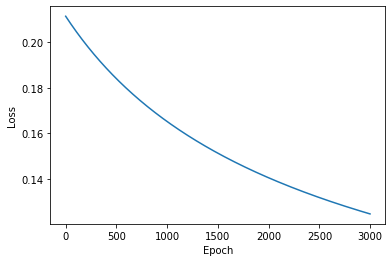

In [68]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

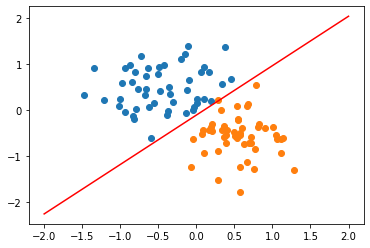

In [71]:
plot_fit('Trainer Model')

Red point positive probability =  0.995514452457428
Black point positive probability =  0.0023846160620450974
Red point in class 1
Black point in class 0


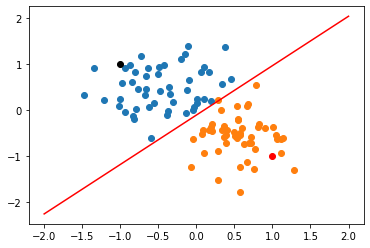

In [72]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
print("Red point positive probability =  {}".format(model.forward(point1).item()))
print("Black point positive probability =  {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit('Trained Model')